In [20]:
import glob
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
import pickle
import warnings
warnings.filterwarnings("ignore")
import cv2
import keras.models

In [21]:
def preProcess(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img = cv2.equalizeHist(img)
    img = img/255.0
    
    return img

In [22]:
cap = cv2.VideoCapture(0)
cap.set(3,480)
cap.set(4,480)

#pickle_in = open("model_trained_new.p","rb")
#model = pickle.load(pickle_in)
model = keras.models.load_model("Model_Folder1/")

In [23]:
while True:
    success, frame = cap.read()
    
    img = np.asarray(frame)
    img = cv2.resize(img,(32,32))
    img = preProcess(img)
    
    img = img.reshape(1,32,32,1)
    
    #predict
    predict_x = model.predict(img)
    classIndex = np.argmax(predict_x,axis=1) 
    
    predictions = model.predict(img)
    probVal = np.amax(predictions)
    print(classIndex,probVal)

    if probVal > 0.7:
        cv2.putText(frame, str(classIndex) + "    "+ str(probVal),(50,50),cv2.FONT_HERSHEY_DUPLEX,1,(0,255,0),1)

    cv2.imshow("Rakam Sınıflandırma",frame)
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break
        
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 34ms/step
[0] 0.79549307
1/1 [==============================] - 0s 25ms/step
[0] 0.79564285
1/1 [==============================] - 0s 20ms/step
[0] 0.7988794
1/1 [==============================] - 0s 27ms/step
[0] 0.7967343
1/1 [==============================] - 0s 29ms/step
[0] 0.7926974
1/1 [==============================] - 0s 28ms/step
[0] 0.79701245
1/1 [==============================] - 0s 22ms/step
[0] 0.79974073
1/1 [==============================] - 0s 28ms/step
[0] 0.79827166
1/1 [==============================] - 0s 24ms/step
[0] 0.79981923
1/1 [==============================] - 0s 15ms/step
[0] 0.7968261
1/1 [==============================] - 0s 20ms/step
[0] 0.79978806
1/1 [==============================] - 0s 24ms/step
[0] 0.79749316
1/1 [==============================] - 0s 21ms/step
[0] 0.7947901
1/1 [==============================] - 0s 23ms/step
[0] 0.79638445
1/1 [==============================] - 0s 20ms/step
[0] 0.79907846


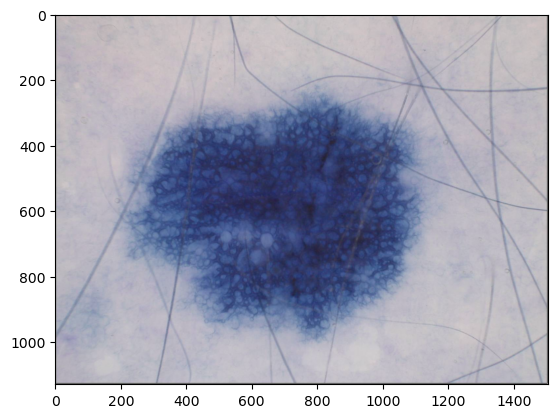

In [27]:
imgessss = cv2.imread("myData/0/ISIC_0000019.jpg",1)
plt.figure()
plt.imshow(imgessss)

In [29]:
img = np.asarray(img)
img = cv2.resize(imgessss,(32,32))
img = preProcess(img)
img = img.reshape(1,32,32,1)

predict_x = model.predict(img)
classIndex = np.argmax(predict_x,axis=1)

predictions = model.predict(img)
probVal = np.amax(predictions)
print(classIndex,probVal)


cv2.waitKey(0)
cv2.destroyAllWindows()

1/1 [==============================] - 0s 15ms/step
[0] 0.8637259
